In [11]:
import pandas as pd


In [12]:
import numpy as np

In [13]:
Data1=pd.read_csv('/content/placement.csv')
Data1.head()
Data1.shape

(100, 4)

In [14]:
Data1.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [17]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [16]:
Data1=Data1.iloc[:,1:]  #Preprocess  #: means, want all rows ,1: means I want column from 1 onwards
Data1.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [18]:
import matplotlib.pyplot as plt


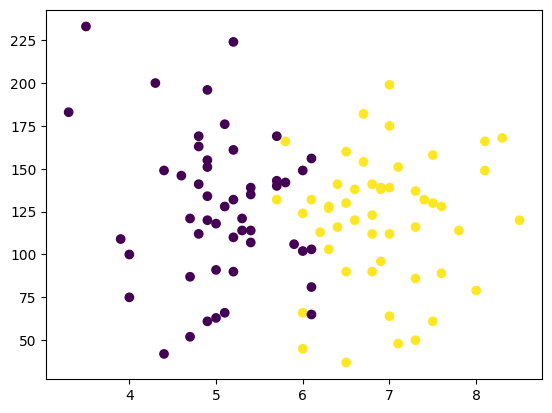

In [23]:
plt.scatter(Data1['cgpa'],Data1['iq'],c=Data1['placement'])  #EDA

In [24]:
x=Data1.iloc[:,0:2]
y=Data1.iloc[:,-1]

In [25]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [26]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [30]:
x_train

,cgpa,iq
42,7.6,89.0
89,4.9,151.0
69,8.5,120.0
18,4.0,100.0
50,3.5,233.0
...,...,...
34,4.8,163.0
81,5.4,107.0
92,5.2,110.0
53,8.3,168.0


In [31]:
y_train

,placement
42,1
89,0
69,1
18,0
50,0
...,...
34,0
81,0
92,0
53,1


In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [34]:
x_train=scaler.fit_transform(x_train)
x_train

array([[ 1.41145266, -0.89968401],
       [-0.94258301,  0.65601378],
       [ 2.19613122, -0.12183511],
       [-1.72726156, -0.62367311],
       [-2.1631941 ,  2.71354958],
       [ 0.36521459,  0.40509478],
       [-0.94258301, -0.12183511],
       [-0.68102349, -0.87459211],
       [ 0.88833363,  0.35491098],
       [ 1.32426616, -1.60225721],
       [ 0.10365507,  0.17926768],
       [-0.76820999,  1.28331128],
       [-0.50665048,  0.35491098],
       [ 0.5395876 ,  0.32981908],
       [ 1.8473852 ,  1.03239228],
       [-1.46570205,  1.88551688],
       [-0.24509096,  1.10766798],
       [ 0.45240109, -0.87459211],
       [ 1.8473852 ,  0.60582998],
       [ 0.71396061,  0.40509478],
       [ 1.41145266,  0.07890009],
       [-0.68102349,  0.17926768],
       [ 1.14989314,  0.30472718],
       [ 0.88833363,  1.86042498],
       [ 0.36521459, -0.22220271],
       [-1.02976951,  1.10766798],
       [ 0.01646856,  0.60582998],
       [-1.11695602, -1.82808431],
       [ 0.10365507,

In [35]:
x_test=scaler.fit_transform(x_test)
x_test

array([[-0.07629088, -1.8230667 ],
       [-1.12529047,  1.16556723],
       [ 0.97270871, -1.7415585 ],
       [ 0.78198151,  0.70368744],
       [-1.12529047,  0.59500985],
       [-1.60210847,  1.00255084],
       [ 0.68661792, -0.00271694],
       [-0.64847248,  0.05162186],
       [ 1.35416311,  0.48633225],
       [ 0.78198151, -0.43742733]])

In [36]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [37]:
model.fit(x_train,y_train)  #model training

LogisticRegression()

In [41]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 1])

In [39]:
y_test

,placement
10,1
76,0
5,1
11,1
40,0
88,0
93,1
41,0
83,1
66,1


In [43]:
from sklearn.metrics import accuracy_score


In [45]:
accuracy_score(y_test,y_pred)

0.9

In [48]:
#For plotting decision boundar of my model
from mlxtend.plotting import plot_decision_regions

<Axes: >

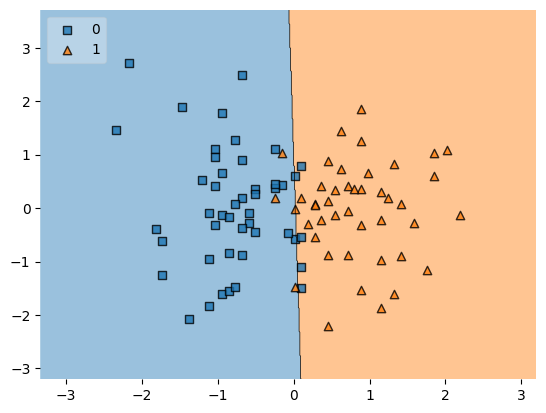

In [50]:
plot_decision_regions(x_train,y_train.values,clf=model,legend=2)

In [51]:
import pickle

In [52]:
pickle.dump(model,open('Logistic_model.pkl','wb'))